In [4]:
import pandas as pd #引入常用库
import matplotlib.pyplot as plt
import numpy as np

#加载数据
file_path = 'PRSA_data_2010.1.1-2014.12.31.csv'
df = pd.read_csv(file_path)

#查看前5行，理解结构
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [6]:
df.info() # 查看表结构信息，了解是否有缺失值

#查看统计描述信息
df.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [8]:
#创建datetime时间列
df['datetime'] = pd.to_datetime(df[['year','month','day','hour']])

#将datetime列设置为索引常用于时间序列分析和可视化
df.set_index('datetime',inplace=True)

#查看结构是否成功
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
datetime,,,,,,,,,,,,,
2010-01-01 00:00:00,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [12]:
#查看每列缺失数值
print(df.isnull().sum)

#查看pm2.5缺失值占比
pm25_missing_ratio = df['pm2.5'].isnull().mean()
print(f"pm2.5缺失占比：{pm25_missing_ratio:.2%}")

#使用前向填充处理pm2.5缺失值
df['pm2.5'].fillna(method='ffill',inplace=True)


#再次确认是否还有缺失值
print(df['pm2.5'].isnull().sum())

#使用后向填充补齐最前端缺失值
df['pm2.5'] = df['pm2.5'].fillna(method='bfill')




<bound method DataFrame.sum of                         No   year  month    day   hour  pm2.5   DEWP   TEMP  \
datetime                                                                      
2010-01-01 00:00:00  False  False  False  False  False   True  False  False   
2010-01-01 01:00:00  False  False  False  False  False   True  False  False   
2010-01-01 02:00:00  False  False  False  False  False   True  False  False   
2010-01-01 03:00:00  False  False  False  False  False   True  False  False   
2010-01-01 04:00:00  False  False  False  False  False   True  False  False   
...                    ...    ...    ...    ...    ...    ...    ...    ...   
2014-12-31 19:00:00  False  False  False  False  False  False  False  False   
2014-12-31 20:00:00  False  False  False  False  False  False  False  False   
2014-12-31 21:00:00  False  False  False  False  False  False  False  False   
2014-12-31 22:00:00  False  False  False  False  False  False  False  False   
2014-12-31 23:00:00  

C:\Users\Ender\AppData\Local\Temp\ipykernel_20892\2863098140.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pm2.5'].fillna(method='ffill',inplace=True)
C:\Users\Ender\AppData\Local\Temp\ipykernel_20892\2863098140.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['pm2.5'].fillna(method='ffill',inplace=True)
C:\Users\Ender\AppData\Local\Temp\ipykernel_20892\2863098140.py:16: FutureWarning: Series.fillna with 'method' is depreca

In [13]:
#再次确认是否还有缺失值
print(df['pm2.5'].isnull().sum())

0


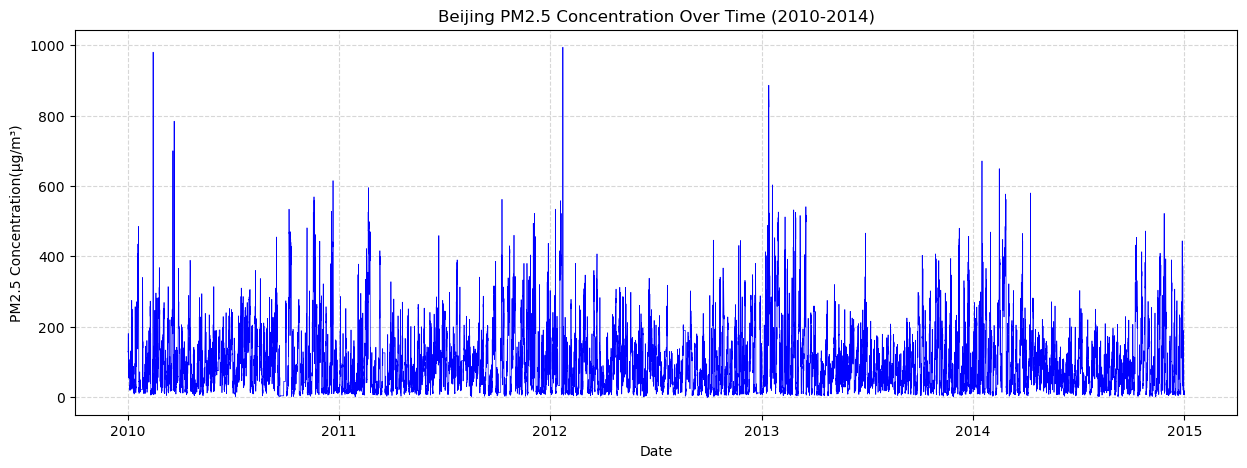

In [15]:
#设置图画大小
plt.figure(figsize=(15,5))

#绘制PM2.5时间序列趋势图
plt.plot(df.index,df['pm2.5'],color='blue',linewidth=0.5)

#图标标题和标签
plt.title('Beijing PM2.5 Concentration Over Time (2010-2014)')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration(µg/m³)')

#显示网络
plt.grid(True,linestyle='--',alpha=0.5)

#显示图标
plt.show()
           

PM2.5 最大值：994.0
出现时间：2012-01-23 01:00:00


C:\Users\Ender\AppData\Local\Temp\ipykernel_20892\3213913016.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pm25j_monthly_mean = df['pm2.5'].resample('M').mean()


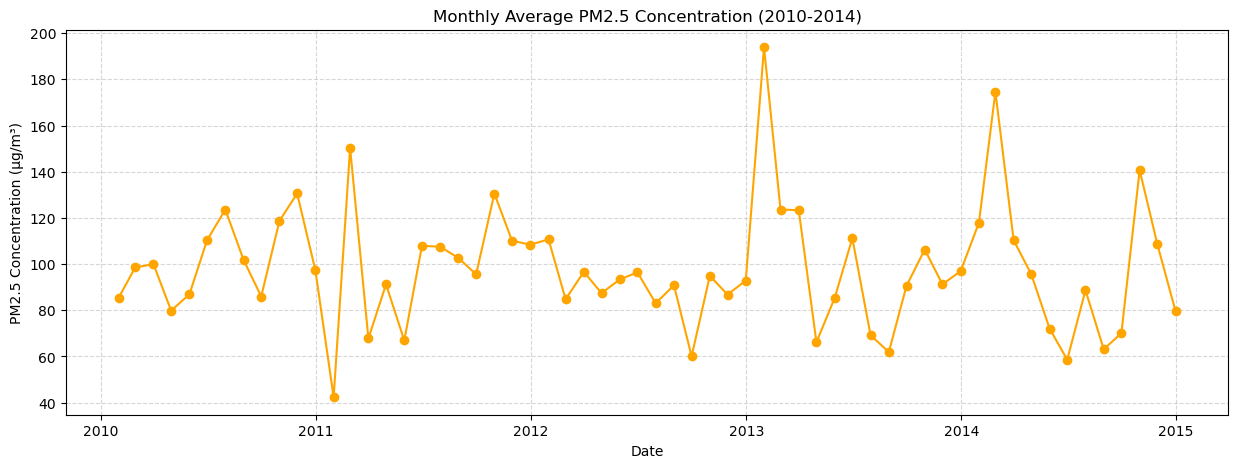

In [22]:
# 按月份重采样取均值（便于查看季节性）
pm25j_monthly_mean = df['pm2.5'].resample('M').mean()


# 绘图查看月均变化趋势
plt.figure(figsize=(15,5))
plt.plot(pm25j_monthly_mean.index,pm25j_monthly_mean.values,color='orange',marker='o')
plt.title('Monthly Average PM2.5 Concentration (2010-2014)')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.grid(True,linestyle='--',alpha=0.5)
plt.show

#查看PM2.5最大值以及对应时间 （找出异常值）
max_pm25 = df['pm2.5'].max()
max_pm25_time = df['pm2.5'].idxmax()
print(f"PM2.5 最大值：{max_pm25}")
print(f"出现时间：{max_pm25_time}")

## 绘制散点图观察相关性关系

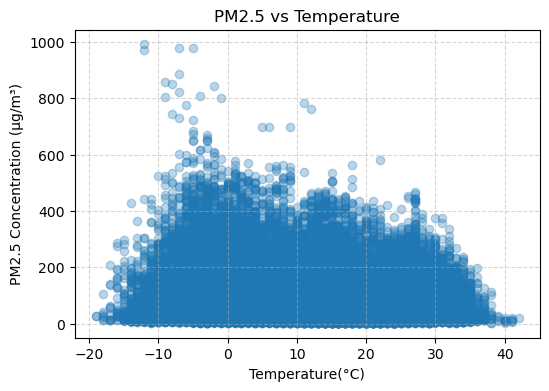

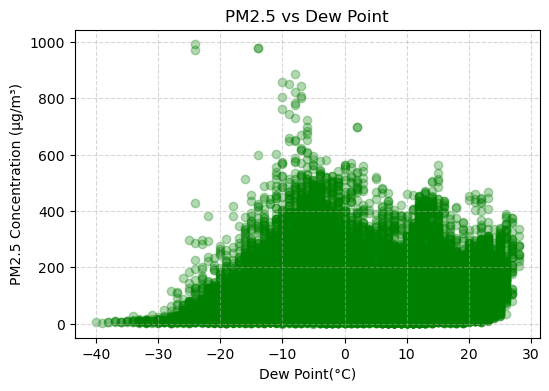

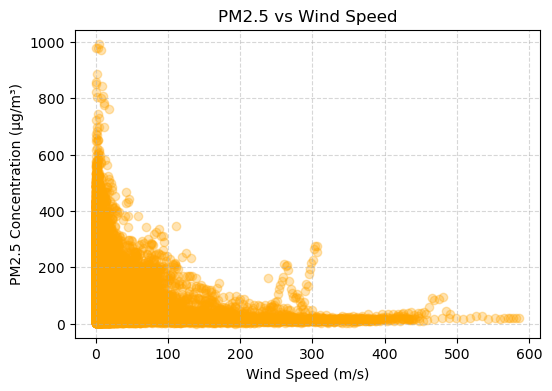

In [24]:
# 散点图：PM2.5 vs TEMP

plt.figure(figsize=(6,4))
plt.scatter(df['TEMP'],df['pm2.5'],alpha=0.3)
plt.xlabel('Temperature(°C)')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.title('PM2.5 vs Temperature')
plt.grid(True, linestyle='--',alpha=0.5)
plt.show()


# 散点图：PM2.5 vs DEWP
plt.figure(figsize=(6,4))
plt.scatter(df['DEWP'],df['pm2.5'],alpha=0.3,color='green')
plt.xlabel('Dew Point(°C)')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.title('PM2.5 vs Dew Point')
plt.grid(True, linestyle='--',alpha=0.5)
plt.show()

# 散点图：PM2.5 vs Iws (风速)
plt.figure(figsize=(6,4))
plt.scatter(df['Iws'],df['pm2.5'],alpha=0.3,color='orange')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.title('PM2.5 vs Wind Speed')
plt.grid(True, linestyle='--',alpha=0.5)
plt.show()

In [27]:
# 提取关注的列
corr_columns = ['pm2.5','TEMP','DEWP','Iws']
corr_matrix = df[corr_columns].corr()

print(corr_matrix)

          pm2.5      TEMP      DEWP       Iws
pm2.5  1.000000 -0.078106  0.174881 -0.243087
TEMP  -0.078106  1.000000  0.824633 -0.154623
DEWP   0.174881  0.824633  1.000000 -0.296399
Iws   -0.243087 -0.154623 -0.296399  1.000000


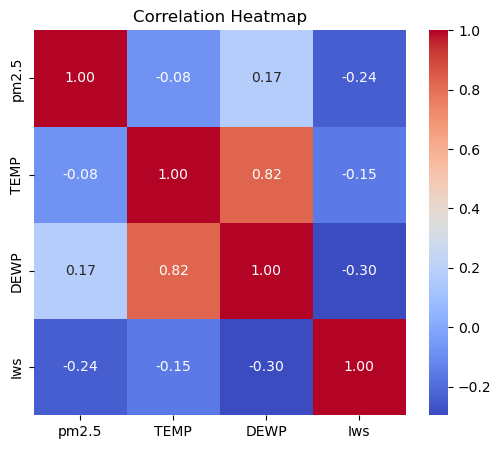

In [28]:
#绘制相关性热力图
import seaborn as sns

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## 按月份绘制箱线图/柱状图，做季节性可视化

1️⃣ 按月份聚合求均值，做柱状图

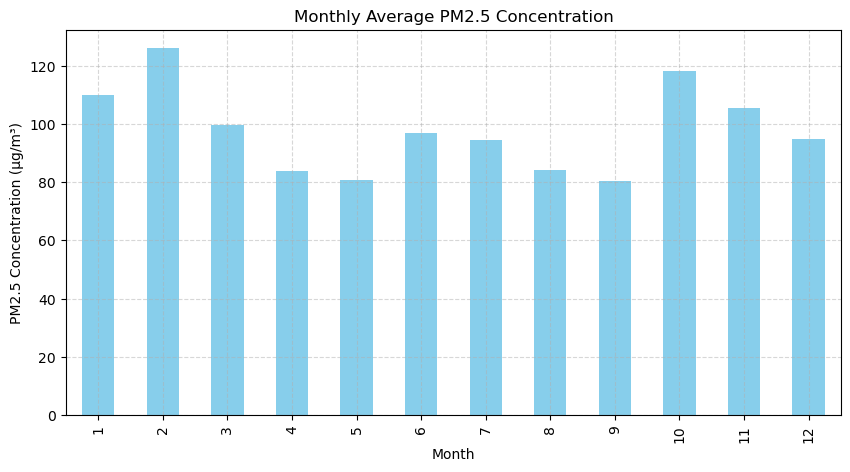

In [30]:
# 创建月份列
df['month']=df.index.month

# 按月份求 PM2.5 平均值
monthly_mean = df.groupby('month')['pm2.5'].mean()

# 绘制柱状图
plt.figure(figsize=(10,5))
monthly_mean.plot(kind='bar',color='skyblue')
plt.title('Monthly Average PM2.5 Concentration')
plt.xlabel('Month')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.grid(True,linestyle='--',alpha=0.5)
plt.show()

# 2️⃣ 按月份绘制箱线图（观察分布、异常值）
箱线图可用于查看：

中位数（黑线）

分布范围（上下四分位）

异常值（散点）

C:\Users\Ender\AppData\Local\Temp\ipykernel_20892\1825124663.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month',y='pm2.5',data=df,palette='Set3')


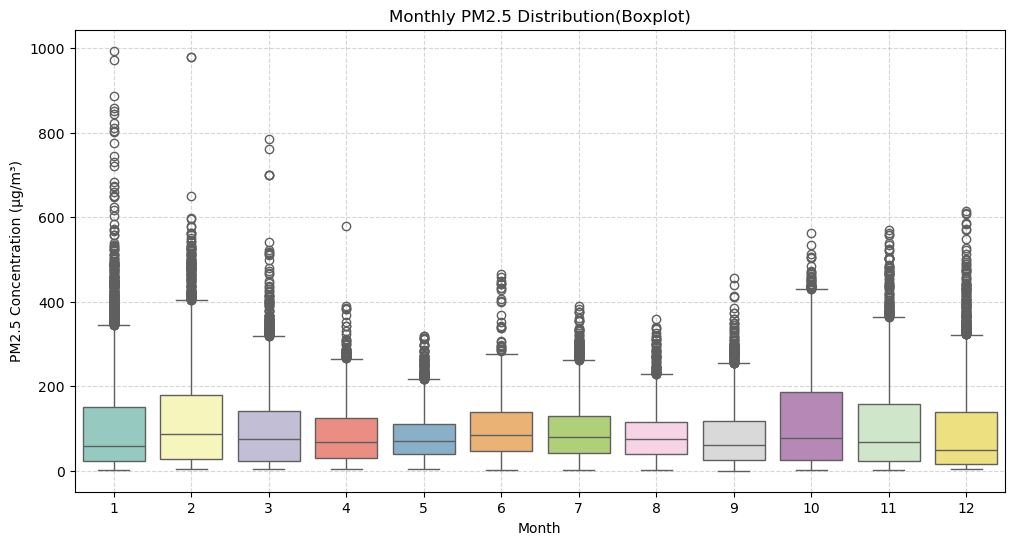

In [33]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(x='month',y='pm2.5',data=df,palette='Set3')
plt.title('Monthly PM2.5 Distribution(Boxplot)')
plt.xlabel('Month')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.grid(True,linestyle='--',alpha=0.5)
plt.show()

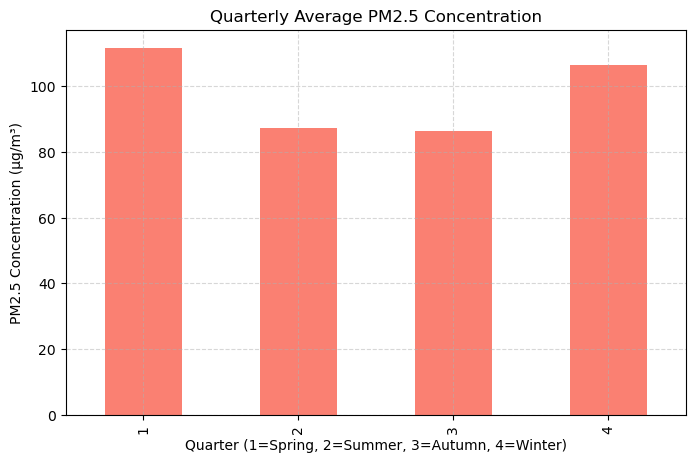

In [38]:
# 添加季度列（1: 春, 2: 夏, 3: 秋, 4: 冬）
df['quarter'] = df.index.quarter

# 季度平均
#柱状图
quarterly_mean = df.groupby('quarter')['pm2.5'].mean()
plt.figure(figsize=(8, 5))
quarterly_mean.plot(kind='bar', color='salmon')
plt.title('Quarterly Average PM2.5 Concentration')
plt.xlabel('Quarter (1=Spring, 2=Summer, 3=Autumn, 4=Winter)')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()




C:\Users\Ender\AppData\Local\Temp\ipykernel_20892\2868873960.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quarter', y='pm2.5', data=df, palette='Pastel1')


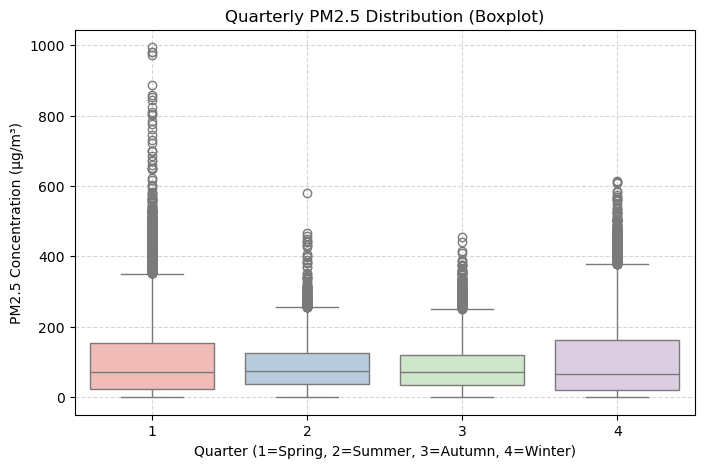

In [39]:
#季度分布箱线图
plt.figure(figsize=(8, 5))
sns.boxplot(x='quarter', y='pm2.5', data=df, palette='Pastel1')
plt.title('Quarterly PM2.5 Distribution (Boxplot)')
plt.xlabel('Quarter (1=Spring, 2=Summer, 3=Autumn, 4=Winter)')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### 年度趋势可视化

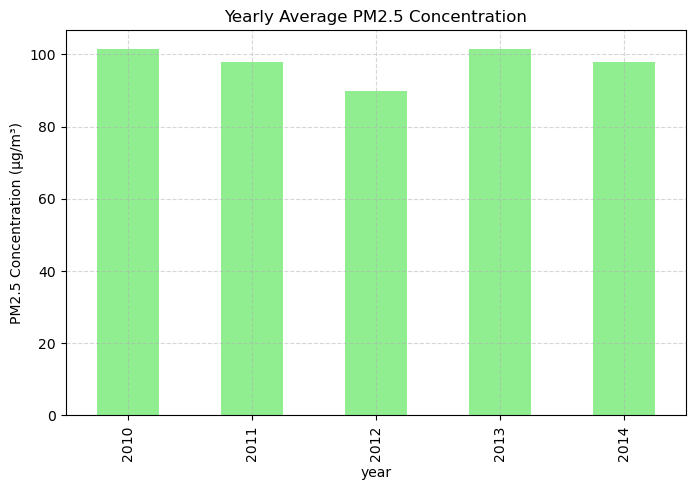

In [41]:
# 按年份取均值
#柱状图：年度平均 PM2.5
yearly_mean = df.groupby('year')['pm2.5'].mean()

plt.figure(figsize=(8,5))
yearly_mean.plot(kind='bar',color='lightgreen')
plt.title('Yearly Average PM2.5 Concentration')
plt.xlabel('year')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.grid(True, linestyle='--',alpha=0.5)
plt.show()

*折线图：年度月均趋势（细粒度)*

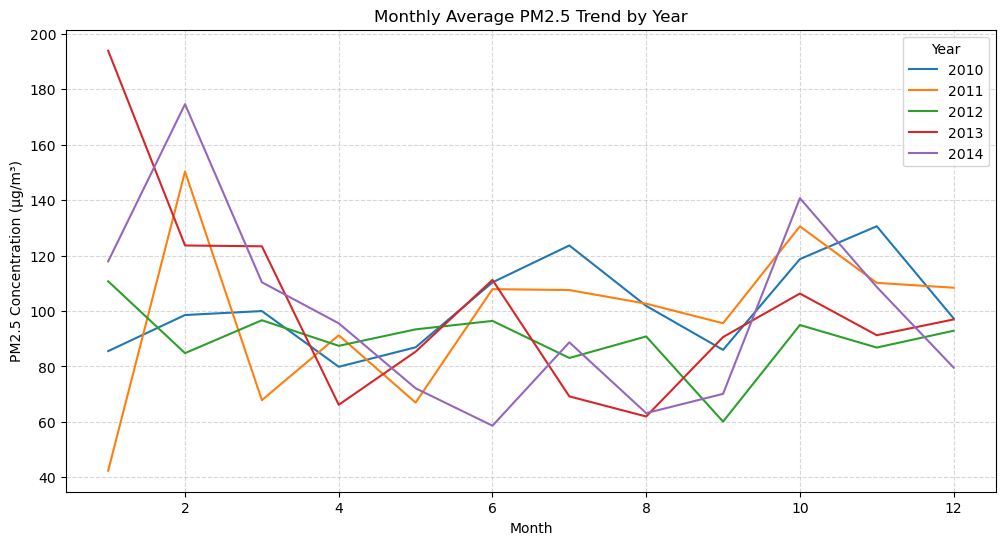

In [44]:
monthly_mean_by_year = df.groupby(['year','month'])['pm2.5'].mean().unstack(level=0)
monthly_mean_by_year.plot(figsize=(12,6))
plt.title('Monthly Average PM2.5 Trend by Year')
plt.xlabel('Month')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Year')
plt.show()